# Explore here

In [26]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

insurance_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
insurance_data.to_csv("../data/raw/insurance_data.csv")
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
if insurance_data.duplicated().sum():
    insurance_data = insurance_data.drop_duplicates()


In [6]:
insurance_data.drop(columns=["region"], inplace=True)
insurance_data.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [7]:
object_columns = insurance_data.select_dtypes(include="object").columns

for col in object_columns:
    insurance_data[col], _ = pd.factorize(insurance_data[col])


scaler = MinMaxScaler()
numeric_columns = insurance_data.select_dtypes(include=['float64', 'int64']).columns
scal_features = scaler.fit_transform(insurance_data[numeric_columns])
insurance_data_scal = pd.DataFrame(scal_features, index=insurance_data.index, columns=numeric_columns)

insurance_data_scal.head()

,age,sex,bmi,children,smoker,charges
0,0.021739,0.0,0.321227,0.0,0.0,0.251611
1,0.000000,1.0,0.479150,0.2,1.0,0.009636
2,0.217391,1.0,0.458434,0.6,1.0,0.053115
3,0.326087,1.0,0.181464,0.0,1.0,0.333010
4,0.304348,1.0,0.347592,0.0,1.0,0.043816


In [8]:
X = insurance_data_scal.drop("charges", axis=1)
y= insurance_data_scal["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
selection_model = SelectKBest(f_regression, k=4)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]

X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=selected_columns)

X_train_sel.head()


,age,bmi,children,smoker
0,0.108696,0.230024,0.0,1.0
1,0.065217,0.263250,0.4,1.0
2,0.739130,0.580172,0.4,1.0
3,0.978261,0.686306,0.0,1.0
4,0.630435,0.286252,0.4,1.0


In [11]:
X_test_sel.head()

,age,bmi,children,smoker
0,0.673913,0.176352,0.0,1.0
1,0.239130,0.259349,0.8,1.0
2,0.717391,0.549502,0.6,1.0
3,0.282609,0.495830,0.6,0.0
4,0.282609,0.603444,0.4,1.0


In [12]:
X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [13]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,age,bmi,children,smoker,charges
0,0.108696,0.230024,0.0,1.0,0.020339
1,0.065217,0.263250,0.4,1.0,0.034446
2,0.739130,0.580172,0.4,1.0,0.516374
3,0.978261,0.686306,0.0,1.0,0.196070
4,0.630435,0.286252,0.4,1.0,0.137177


In [14]:
test_data.head()

,age,bmi,children,smoker,charges
0,0.673913,0.176352,0.0,1.0,0.120785
1,0.239130,0.259349,0.8,1.0,0.073218
2,0.717391,0.549502,0.6,1.0,0.164646
3,0.282609,0.495830,0.6,0.0,0.600564
4,0.282609,0.603444,0.4,1.0,0.053335


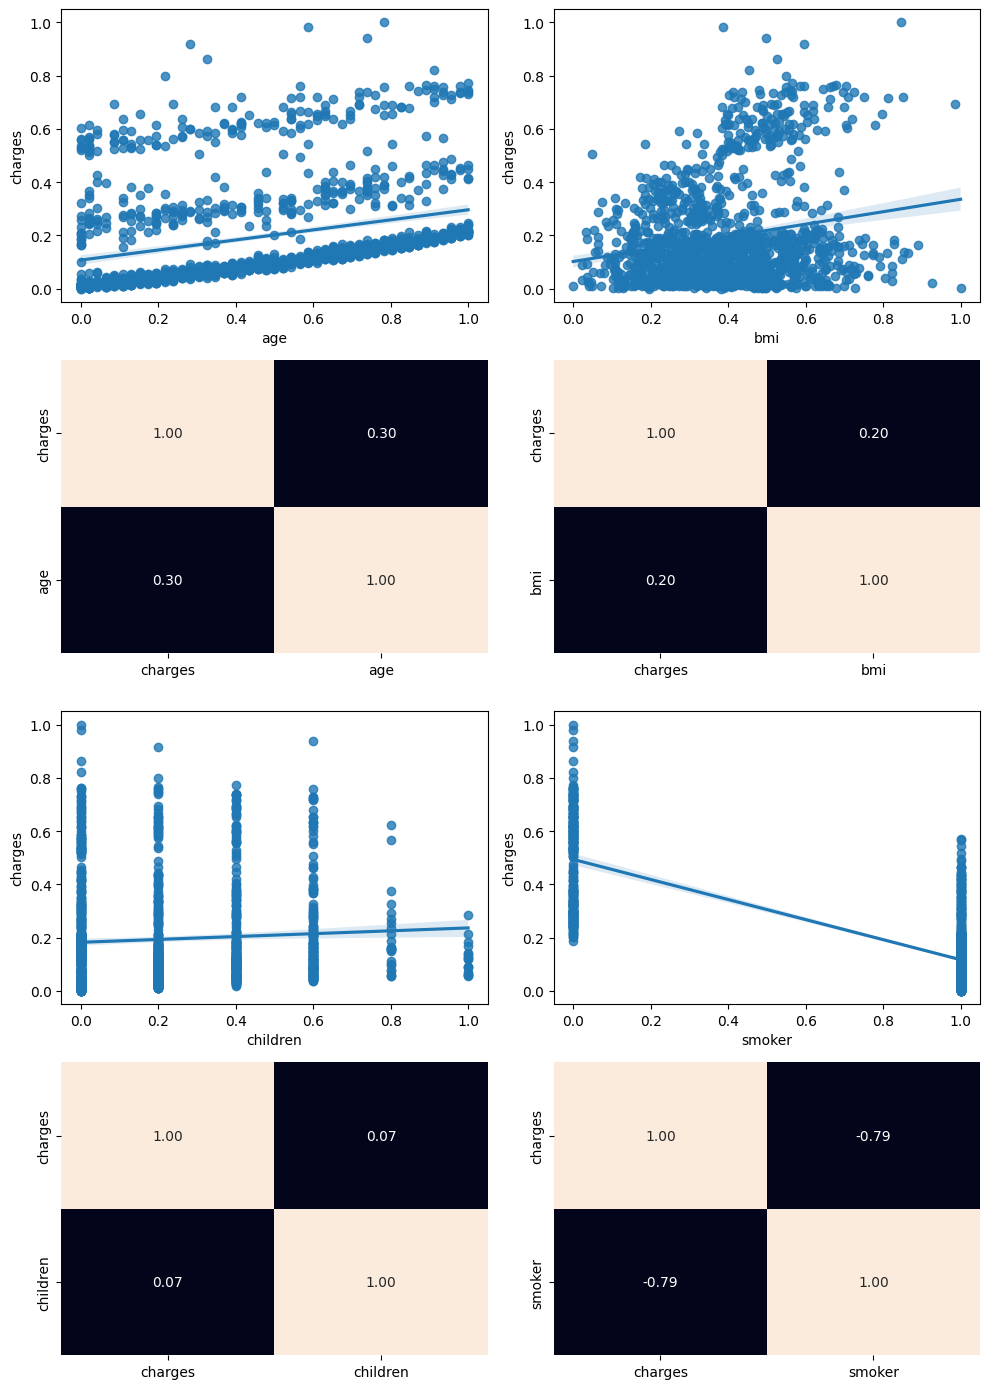

In [20]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14))
total_data = pd.concat([train_data, test_data])

sns.regplot(ax = axis[0, 0], data = total_data, x = "age", y = "charges")
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "bmi", y = "charges")
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[2, 0], data = total_data, x = "children", y = "charges")
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(ax = axis[2, 1], data = total_data, x = "smoker", y = "charges")
sns.heatmap(total_data[["charges", "smoker"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()

plt.show()

In [21]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b): {model.coef_}")

Intercepto (a): 0.3195827183308946
Coeficientes (b): [ 0.1829699   0.18111814  0.04293572 -0.36780589]


In [25]:
y_pred = model.predict(X_test)
y_pred

array([ 0.10702315,  0.07685187,  0.2083241 ,  0.48685684,  0.12995459,
        0.19726353,  0.45755859,  0.00832554,  0.1556988 ,  0.16287349,
        0.14781084,  0.51037008,  0.4699569 ,  0.25944432,  0.14442757,
        0.13842465,  0.05134994,  0.49351746,  0.03848664,  0.0705325 ,
        0.04276279,  0.45855586,  0.22245537,  0.47182868,  0.47460549,
        0.06698449,  0.55116209,  0.5686984 ,  0.15588314,  0.20127518,
        0.0770878 ,  0.19051001, -0.00377298,  0.17967676,  0.61602286,
        0.18050297,  0.06028104,  0.0447116 ,  0.48287007,  0.13064786,
        0.08387671,  0.45610213,  0.54228697,  0.17124485,  0.09976616,
        0.03950023,  0.07028081,  0.12772953,  0.04874519,  0.13229562,
        0.09175793,  0.1653832 ,  0.47297483,  0.04437078,  0.16108797,
        0.14414371,  0.14902535,  0.02014774,  0.48426463,  0.13172362,
        0.2337337 ,  0.11691   ,  0.18103216,  0.00130779,  0.25281818,
        0.14612565,  0.14268127,  0.47671561,  0.38076578,  0.23

In [27]:
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 0.009150574110332004
Coeficiente de determinación: 0.8045531086669286
